In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


## Carregando o dataset ' Boston House Pricing Dataset'


In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()

In [4]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
#Vamos checar a descrição do dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


## Preparing the dataset

In [7]:
dataset = pd.DataFrame(california.data, columns = california.feature_names)

In [8]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [10]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [11]:
##Check the missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [12]:
## Exploratory Data Analysis
#Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [13]:
import pandas as pd
import numpy as np

# Suponha que 'df' seja o seu DataFrame
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.pairplot(dataset)

NameError: name 'sns' is not defined

##Analysing the correleation features

In [29]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


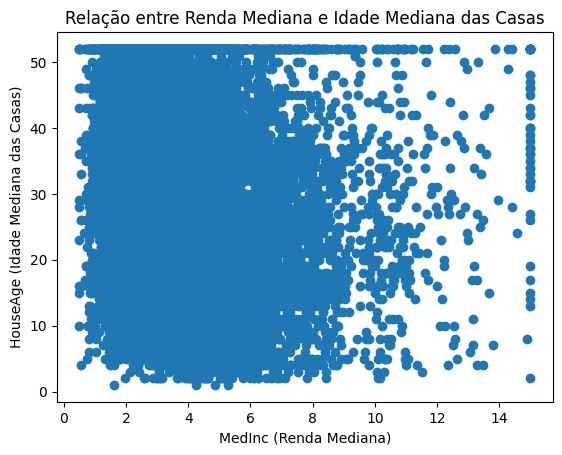

In [30]:
plt.scatter(dataset['MedInc'], dataset['HouseAge'])
plt.xlabel('MedInc (Renda Mediana)')
plt.ylabel('HouseAge (Idade Mediana das Casas)')
plt.title('Relação entre Renda Mediana e Idade Mediana das Casas')
plt.show()

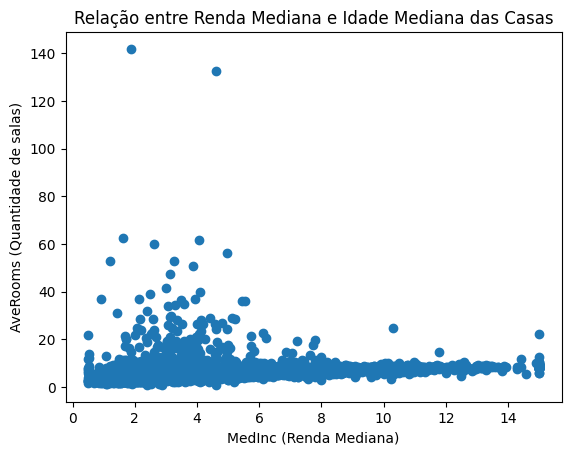

In [31]:
##Conferindo o numero de quartos
plt.scatter(dataset['MedInc'], dataset['AveRooms'])
plt.xlabel('MedInc (Renda Mediana)')
plt.ylabel('AveRooms (Quantidade de salas)')
plt.title('Relação entre Renda Mediana e Idade Mediana das Casas')
plt.show()

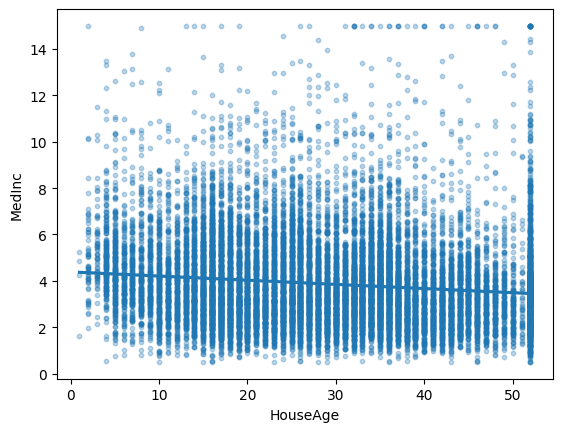

In [32]:
import seaborn as sns
sns.regplot(x = "HouseAge", y="MedInc", data =dataset,scatter_kws={'alpha':0.3, 's':10})

def fig(x,xlabel):
    sns.regplot(x = x, y="MedInc",data = dataset,scatter_kws={'alpha':0.3, 's':10})
    plt.xlabel(xlabel)
    plt.ylabel('MedInc (Renda Mediana)')
    plt.show()
    

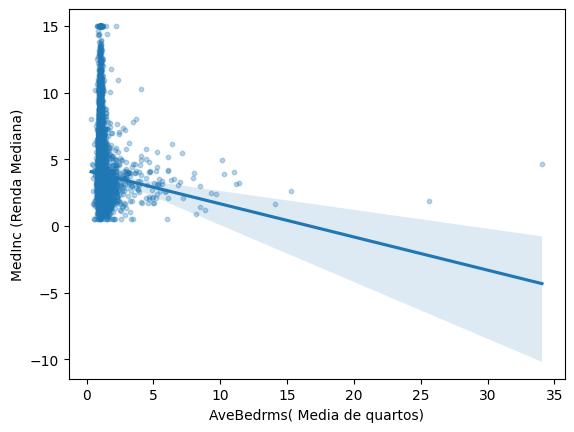

In [33]:
def fig(x,xlabel):
    sns.regplot(x = x, y="MedInc",data = dataset,scatter_kws={'alpha':0.3, 's':10})
    plt.xlabel(xlabel)
    plt.ylabel('MedInc (Renda Mediana)')
    plt.show()

fig("AveBedrms","AveBedrms( Media de quartos)")

In [34]:
y = dataset["MedInc"]
X = dataset.drop(columns = "MedInc")

In [35]:
X.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [36]:
y

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [37]:
#Train test split
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 24)

In [38]:
X_train

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8796,22.0,7.985201,1.047569,2808.0,2.968288,33.77,-118.41
13139,3.0,7.338559,1.159015,16305.0,3.043113,38.43,-121.44
17624,10.0,5.043296,1.121508,1599.0,2.233240,37.26,-121.95
14912,26.0,4.993610,0.913738,1145.0,3.658147,32.61,-117.05
15504,14.0,7.108481,0.998028,3097.0,3.054241,33.08,-117.25
...,...,...,...,...,...,...,...
6500,52.0,2.360000,0.786667,269.0,3.586667,34.07,-118.04
19857,20.0,5.671815,1.169884,1031.0,3.980695,36.35,-119.42
14528,6.0,4.169837,1.019022,1541.0,2.093750,32.92,-117.14
899,28.0,4.950749,1.062099,1344.0,2.877944,37.54,-121.97


In [39]:
X_test

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3950,23.0,6.296748,1.101626,1486.0,3.020325,34.20,-118.62
3113,11.0,5.500933,1.061567,2728.0,2.544776,35.62,-117.66
10347,21.0,6.755245,0.930070,860.0,3.006993,33.61,-117.66
6971,52.0,6.359909,1.050114,1177.0,2.681093,33.99,-118.03
10940,10.0,3.326642,1.076642,2176.0,3.970803,33.75,-117.88
...,...,...,...,...,...,...,...
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
13389,4.0,4.555874,1.134670,3359.0,2.406160,34.10,-117.58
12840,35.0,4.876344,0.986559,1076.0,2.892473,38.66,-121.43
8471,33.0,5.026163,1.151163,1073.0,3.119186,33.91,-118.32


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [41]:
#Definindo a pipeline para regressão linear
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()), #Padronização
    ('regressor', LinearRegression()) # Modelo a ser otimizado
])
#Grid searchCV - Rl
param_grid_lr = {
    'regressor__fit_intercept': [True, False]
}

In [42]:
#Definindo a pipeline para Arvore de decisao
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])
#Parametros do GridSearchCV
param_grid_dt = {
    'regressor__max_depth':[None, 10, 20, 30],
    'regressor__min_samples_split':[2, 5, 10],
    'regressor__min_samples_leaf':[1, 2, 4]
}


In [43]:
#Definindo a pipline para o random forest com gridSearchCv
pipeline_rf =Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])
# Parâmetros para GridSearchCV - Random Forest
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]  # Corrigido para usar o parâmetro correto
}


In [44]:
#Integrando GridSearchCV dentro das pipelines
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv = 5, scoring = 'r2')
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv = 5, scoring = 'r2')
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv = 5, scoring = 'r2')

In [45]:
#Treinando os modelos e buscando pelos melhores hiperparametros
grid_search_lr.fit(X_train,y_train)
grid_search_dt.fit(X_train,y_train)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='r2')

In [46]:
print(f"Melhor R² para Regressão Linear: {grid_search_lr.best_score_:.3f}")
print(f"Melhor R² para Árvore de Decisão: {grid_search_dt.best_score_:.3f}")
print(f"Melhor R² para Random Forest: {grid_search_rf.best_score_:.3f}")

Melhor R² para Regressão Linear: 0.569
Melhor R² para Árvore de Decisão: 0.671
Melhor R² para Random Forest: 0.783


In [48]:
# Determinando o melhor modelo com base no melhor R²
best_model = None
best_score = -float('inf')

if grid_search_lr.best_score_ > best_score:
    best_model = grid_search_lr.best_estimator_
    best_score = grid_search_lr.best_score_

if grid_search_dt.best_score_ > best_score:
    best_model = grid_search_dt.best_estimator_
    best_score = grid_search_dt.best_score_

if grid_search_rf.best_score_ > best_score:
    best_model = grid_search_rf.best_estimator_
    best_score = grid_search_rf.best_score_

print(f"Melhor modelo selecionado: {best_model}")

# Predição com o melhor modelo no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliação do desempenho no conjunto de teste
print(f'R² no conjunto de teste: {r2_score(y_test, y_pred):.3f}')

Melhor modelo selecionado: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(min_samples_leaf=2, min_samples_split=5,
                                       n_estimators=200))])
R² no conjunto de teste: 0.791


In [49]:
#Print the coefficients and the intercept
print(best_model.coef_)

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [50]:
y_pred

array([5.08320554, 3.33839628, 7.08190602, ..., 2.4418043 , 3.20155721,
       5.10789639])

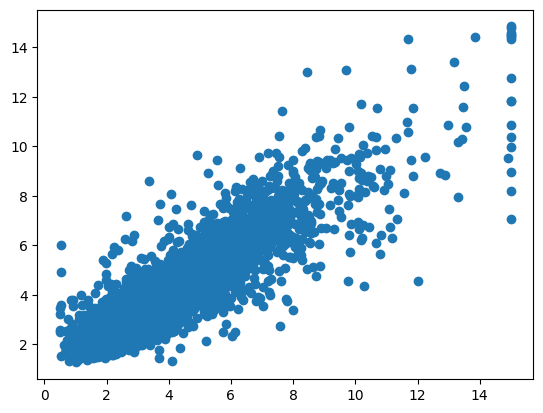

In [51]:
#Plotter a scatter plkoit for the prediciton
plt.scatter(y_test, y_pred)

In [52]:
residuals = y_test - y_pred

In [53]:
residuals

3950     0.678094
3113     0.811604
10347    0.067794
6971    -2.143339
10940   -1.182645
           ...   
4       -2.333623
13389    0.378663
12840    0.276096
8471     1.006743
18165    0.770004
Name: MedInc, Length: 6192, dtype: float64

C:\Users\Alvaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


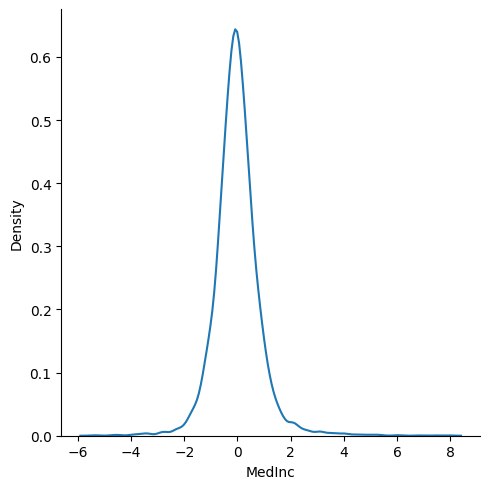

In [54]:
## Plotting this residuals
sns.displot(residuals, kind = "kde")

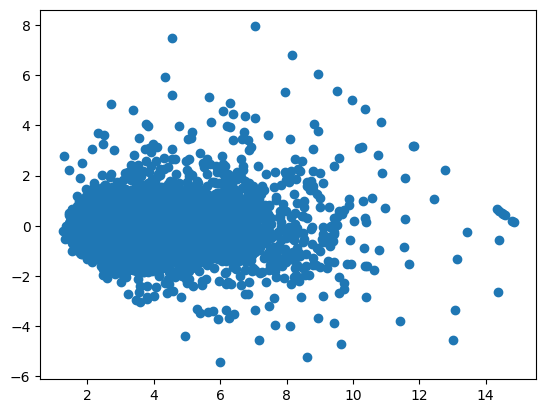

In [55]:
#Scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred))

SyntaxError: incomplete input (3598846358.py, line 6)

## R squred and R square adjust
FOrumla 

R² = 1 - SSR/SST

R² = Coefficient of determiantion SSR = sum of squares of residuals = total sum of squared

In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7905555511026991


## R2 adjust


In [58]:
1- ( 1-score) * (len(y_test)  -1)/len(y_test)-X_test.shape[1]-1)

SyntaxError: unmatched ')' (2068601295.py, line 1)

## New Data Prediction

In [59]:
california.data[0].reshape(1, -1).shape


(1, 8)

In [60]:
best_model.predict(california.data[0].reshape(1, -1).shape)

C:\Users\Alvaro\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
best_model.predict(scaler.transform(california.data[0].reshape(1, -1).shape))

## Pickling the model file for deployment

In [62]:
import pickle

pickle.dump(best_model, open('modelo.pkl','wb'))

In [63]:
with open('modelo.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [64]:
# Supondo que você tenha os dados de teste X_test e y_test
r2_score = loaded_model.score(X_test, y_test)
print(f"R²: {r2_score:.3f}")


R²: 0.791


In [66]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")


Mean Absolute Error: 0.592


In [67]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")


Mean Squared Error: 0.749


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Definindo o modelo
model = loaded_model  # Substitua pelo seu modelo, por exemplo, RandomForestRegressor()

# Gerando as curvas de aprendizado
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculando as médias e desvios padrão
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.plot(train_sizes, -train_mean, 'o-', color="r", label="Erro de Treinamento")
plt.plot(train_sizes, -val_mean, 'o-', color="g", label="Erro de Validação")
plt.fill_between(train_sizes, -train_mean - train_std, -train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, -val_mean - val_std, -val_mean + val_std, alpha=0.1, color="g")
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Erro")
plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Definindo o modelo
model = loaded_model # Substitua pelo seu modelo, por exemplo, RandomForestRegressor()

# Realizando a validação cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calculando a média e o desvio padrão das pontuações
mean_cv_score = -np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f'Mean Cross-Validation MSE: {mean_cv_score:.3f}')
print(f'Standard Deviation of Cross-Validation MSE: {std_cv_score:.3f}')
